In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

Using TensorFlow backend.


In [2]:
# Load the Xception model
# https://keras.io/applications/#xception
model = Xception(
    include_top=True,
    weights='imagenet')

91889664/91884032 [==============================] - 23s 0us/step


In [3]:
# Default Image Size for Xception
image_size = (299, 299)

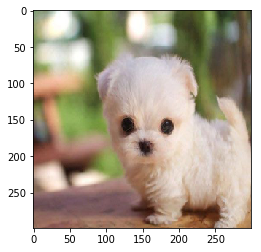

In [4]:
# Load the image and resize to the input dimensions that Xception
# was trained with
image_path = os.path.join("..", "Images", "pup.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [5]:
# Preprocess image for model prediction
# This step handles scaling and normalization for Xception
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [('n02085936', 'Maltese_dog', 0.7673267), ('n02098286', 'West_Highland_white_terrier', 0.019897806), ('n02098413', 'Lhasa', 0.011911355)]


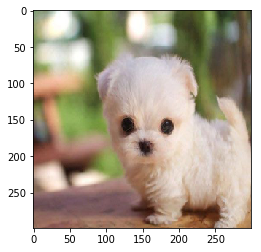

In [6]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [7]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use Xception to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n02123045', 'tabby', 0.49196216), ('n02123159', 'tiger_cat', 0.338667), ('n02124075', 'Egyptian_cat', 0.09069805)]


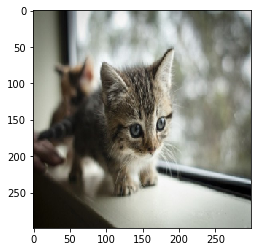

In [8]:
image_path = os.path.join("..", "Images", "kitten.jpg")
predict(image_path)